Paso 1: Cargar y explorar los datos.

Este es el código que te permitirá cargar el archivo CSV en un dataframe de pandas, visualizar la estructura del archivo y detectar si hay valores faltantes.

##### Importar librerías

import missingno as msno  #Librería para visualizar patrones de datos faltantes o nulos. 
import inflection #Librería para convertir entre distintos estilos de nombres de variables
import warnings #Librería estándar de Python que gestiona advertencias durante la ejecución del código. 
import re  # La biblioteca re en Python se utiliza para trabajar con expresiones regulares, que son herramientas poderosas para buscar y manipular cadenas de texto.

# Permite mostrar figuras de matplotlib en el entorno de Jupyter Notebook
%matplotlib inline

# Ignorar las advertencias de Seaborn
warnings.filterwarnings("ignore")



In [3]:
import pandas as pd               # Librería para cargar y manipular el dataset.
import numpy as np                # Librería para operaciones matriciales y numéricas en Python. 
import matplotlib.pyplot as plt   # Parte de Matplotlib, es una librería para crear los gráficos.
import seaborn as sns             # Basada en Matplotlib, es una librería de visualización de datos estadísticos.



#### Cargar y visializar los datos.

In [4]:
# Cargar el dataset
car_data = pd.read_csv('ML_cars.csv')
print("* Los datos fueron cargados correctamente.")
print("- " * 22)

# Mostrar las primeras 5 filas del dataset
print("* Los primeros 5 registros del dataset:")
car_data.head()

* Los datos fueron cargados correctamente.
- - - - - - - - - - - - - - - - - - - - - - 
* Los primeros 5 registros del dataset:


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Ya cargamos los datos correctamente. Tenemos un dataset con varias columnas que representan características de los autos, como el nombre del auto (CarName), el tipo de combustible (fueltype), el tamaño del motor (enginesize), entre otros.

Paso 2: Explorar el dataset

Ahora que cargamos los datos, vamos a hacer una exploración rápida para entender mejor su estructura y la calidad de los datos. Podemos hacer lo siguiente:

- Ver un resumen del dataset.
- Ver el tamaño del dataset (número de filas y columnas).
- Revisar los tipos de datos de cada columna.
- Verificar filas duplicadas.
- Verificar si hay valores nulos.

In [5]:
# Ver resumen del Dataset
print("* Resumen del Dataset:")
print("- " * 25)
print(car_data.info())

* Resumen del Dataset:
- - - - - - - - - - - - - - - - - - - - - - - - - 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber   

In [6]:
# Ver el tamaño del dataset
print(f"* El dataset tiene {car_data.shape[0]} filas y {car_data.shape[1]} columnas.")

* El dataset tiene 205 filas y 26 columnas.


In [7]:
# Ver los tipos de datos de cada columna
print("* Tipos de datos de cada columna:")
print("- " * 18)
print(car_data.dtypes)

* Tipos de datos de cada columna:
- - - - - - - - - - - - - - - - - - 
car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object


In [8]:
# Verificar si hay filas duplicadas
duplicate_rows = car_data[car_data.duplicated()]
num_duplicate_rows = duplicate_rows.shape[0]
print(f"* Filas duplicadas: {num_duplicate_rows}")

* Filas duplicadas: 0


In [9]:
# Verificar si hay valores nulos
print("* Valores nulos en cada columna:")
print("- " * 17)
print(car_data.isnull().sum())

* Valores nulos en cada columna:
- - - - - - - - - - - - - - - - - 
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


Los datos parecen estar en buen estado. No hay filas duplicadas ni valores nulos.

Tipos de Datos en Pandas: En un DataFrame de Pandas, los tipos de datos se asignan automáticamente cuando cargas un archivo CSV. Los tipos más comunes son:
- int64: Para números enteros.
- float64: Para números decimales.
- object: Generalmente para texto o datos categóricos.

Algunas columnas que deberían ser categóricas (como fueltype, aspiration, doornumber, etc.) están clasificadas como object. Esto significa que Pandas las está tratando como texto, pero deberíamos tratarlas como categorías.

Podemos convertir estas columnas a formato category para optimizar el manejo de la memoria y para asegurarnos de que se traten como variables categóricas al entrenar los modelos.

Paso 3: Tipos de variables. Conversión de columnas.

In [10]:
# Obtener los tipos de datos de cada columna en el DataFrame
column_types = car_data.dtypes
print(f"* Número de variables: {len(column_types)}")
print("- - " * 35)

# Inicializar contadores
discrete_count = 0
continuous_count = 0
categorical_count = 0

# Inicializar listas para almacenar nombres de columnas
discrete_columns = []
continuous_columns = []
categorical_columns = []

# Clasificar las columnas según su tipo de dato
for col, dtype in column_types.items():
    if np.issubdtype(dtype, np.integer):
        discrete_count += 1
        discrete_columns.append(col)
    elif np.issubdtype(dtype, np.floating):
        continuous_count += 1
        continuous_columns.append(col)
    elif np.issubdtype(dtype, 'object') or pd.api.types.is_categorical_dtype(dtype):
        categorical_count += 1
        categorical_columns.append(col)

# Imprimir resultados
print(f"* DISCRETAS:\n  * Número de variables: {discrete_count} \n  * Variables: [{', '.join(discrete_columns)}]")  
print("- - " * 35)

print(f"* CONTINUAS:\n  * Número de variables: {continuous_count} \n  * Variables: [{', '.join(continuous_columns)}]")  
print("- - " * 35)

print(f"* CATEGÓRICAS:\n  * Número de variables: {categorical_count} \n  * Variables: [{', '.join(categorical_columns)}]")  
print("- - " * 35)


* Número de variables: 26
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
* DISCRETAS:
  * Número de variables: 8 
  * Variables: [car_ID, symboling, curbweight, enginesize, horsepower, peakrpm, citympg, highwaympg]
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
* CONTINUAS:
  * Número de variables: 8 
  * Variables: [wheelbase, carlength, carwidth, carheight, boreratio, stroke, compressionratio, price]
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
* CATEGÓRICAS:
  * Número de variables: 10 
  * Variables: [CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, enginetype, cylindernumber, fuelsystem]
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

In [11]:
# Verificar la conversión
print("* Tipos de datos de cada columna:")
print("- " * 18)
print(car_data.dtypes)


* Tipos de datos de cada columna:
- - - - - - - - - - - - - - - - - - 
car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object


Las columnas categóricas han sido correctamente convertidas. Ahora que hemos preparado los datos adecuadamente, podemos continuar con el análisis.

Paso 4: Visualización de Distribuciones.

- Visualización de las distribuciones de las variables continuas utilizando histogramas.

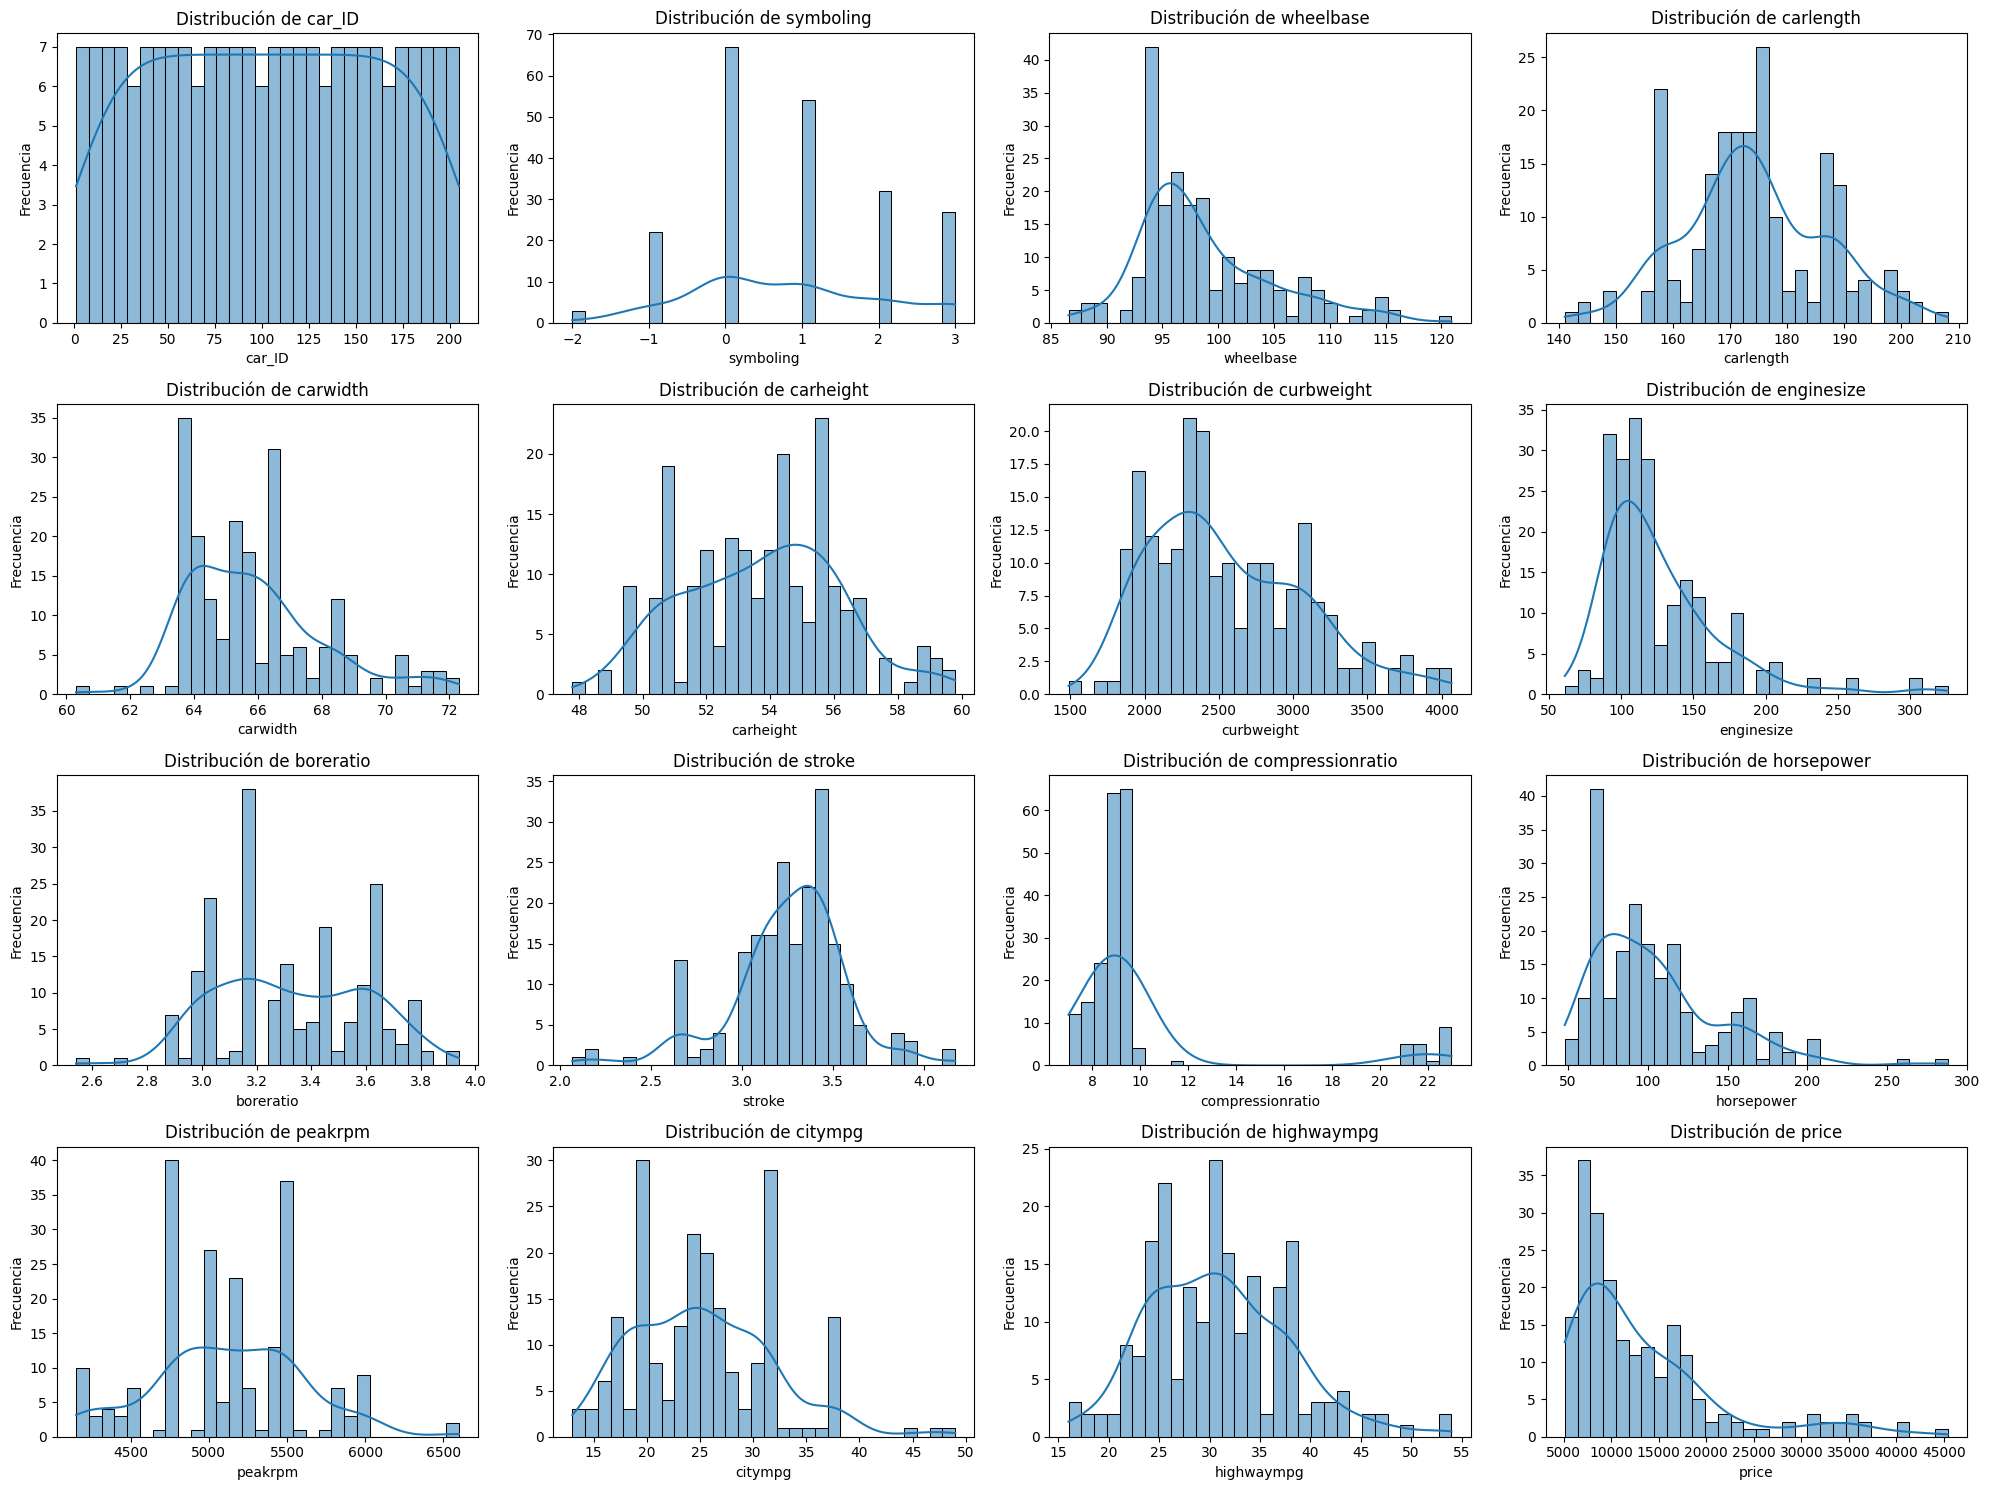

In [12]:
# Seleccionar columnas continuas
continuous_columns = car_data.select_dtypes(include=[np.float64, np.int64]).columns

# Crear una figura con 4 filas y 4 columnas
plt.figure(figsize=(20, 15))  # Ajusta el tamaño según sea necesario

for i, col in enumerate(continuous_columns):
    plt.subplot(4, 4, i + 1)  # Crea un subplot en la posición i+1
    sns.histplot(car_data[col], bins=30, kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()  # Ajusta el espacio entre subplots
plt.show()

Distribución de variables numéricas:

En los histogramas de características numéricas, como carwidth, carheight, curbweight, enginesize, horsepower, y price, puedo identificar que la mayoría de estas distribuciones no son normales. Por ejemplo, el precio presenta una distribución sesgada hacia la derecha, lo que indica que hay más automóviles de bajo costo en el conjunto de datos. Deberé considerar transformaciones de los datos, como escalado o normalización, para mejorar el rendimiento de los modelos de machine learning.
Asimismo, variables como enginesize y horsepower presentan valores atípicos (outliers), lo que podría afectar el modelo de predicción. Probablemente necesite aplicar algún método para manejarlos, ya sea mediante su eliminación o transformación.

- Visualización de las distribuciones de las variables categóricas utilizando gráfico de barras.

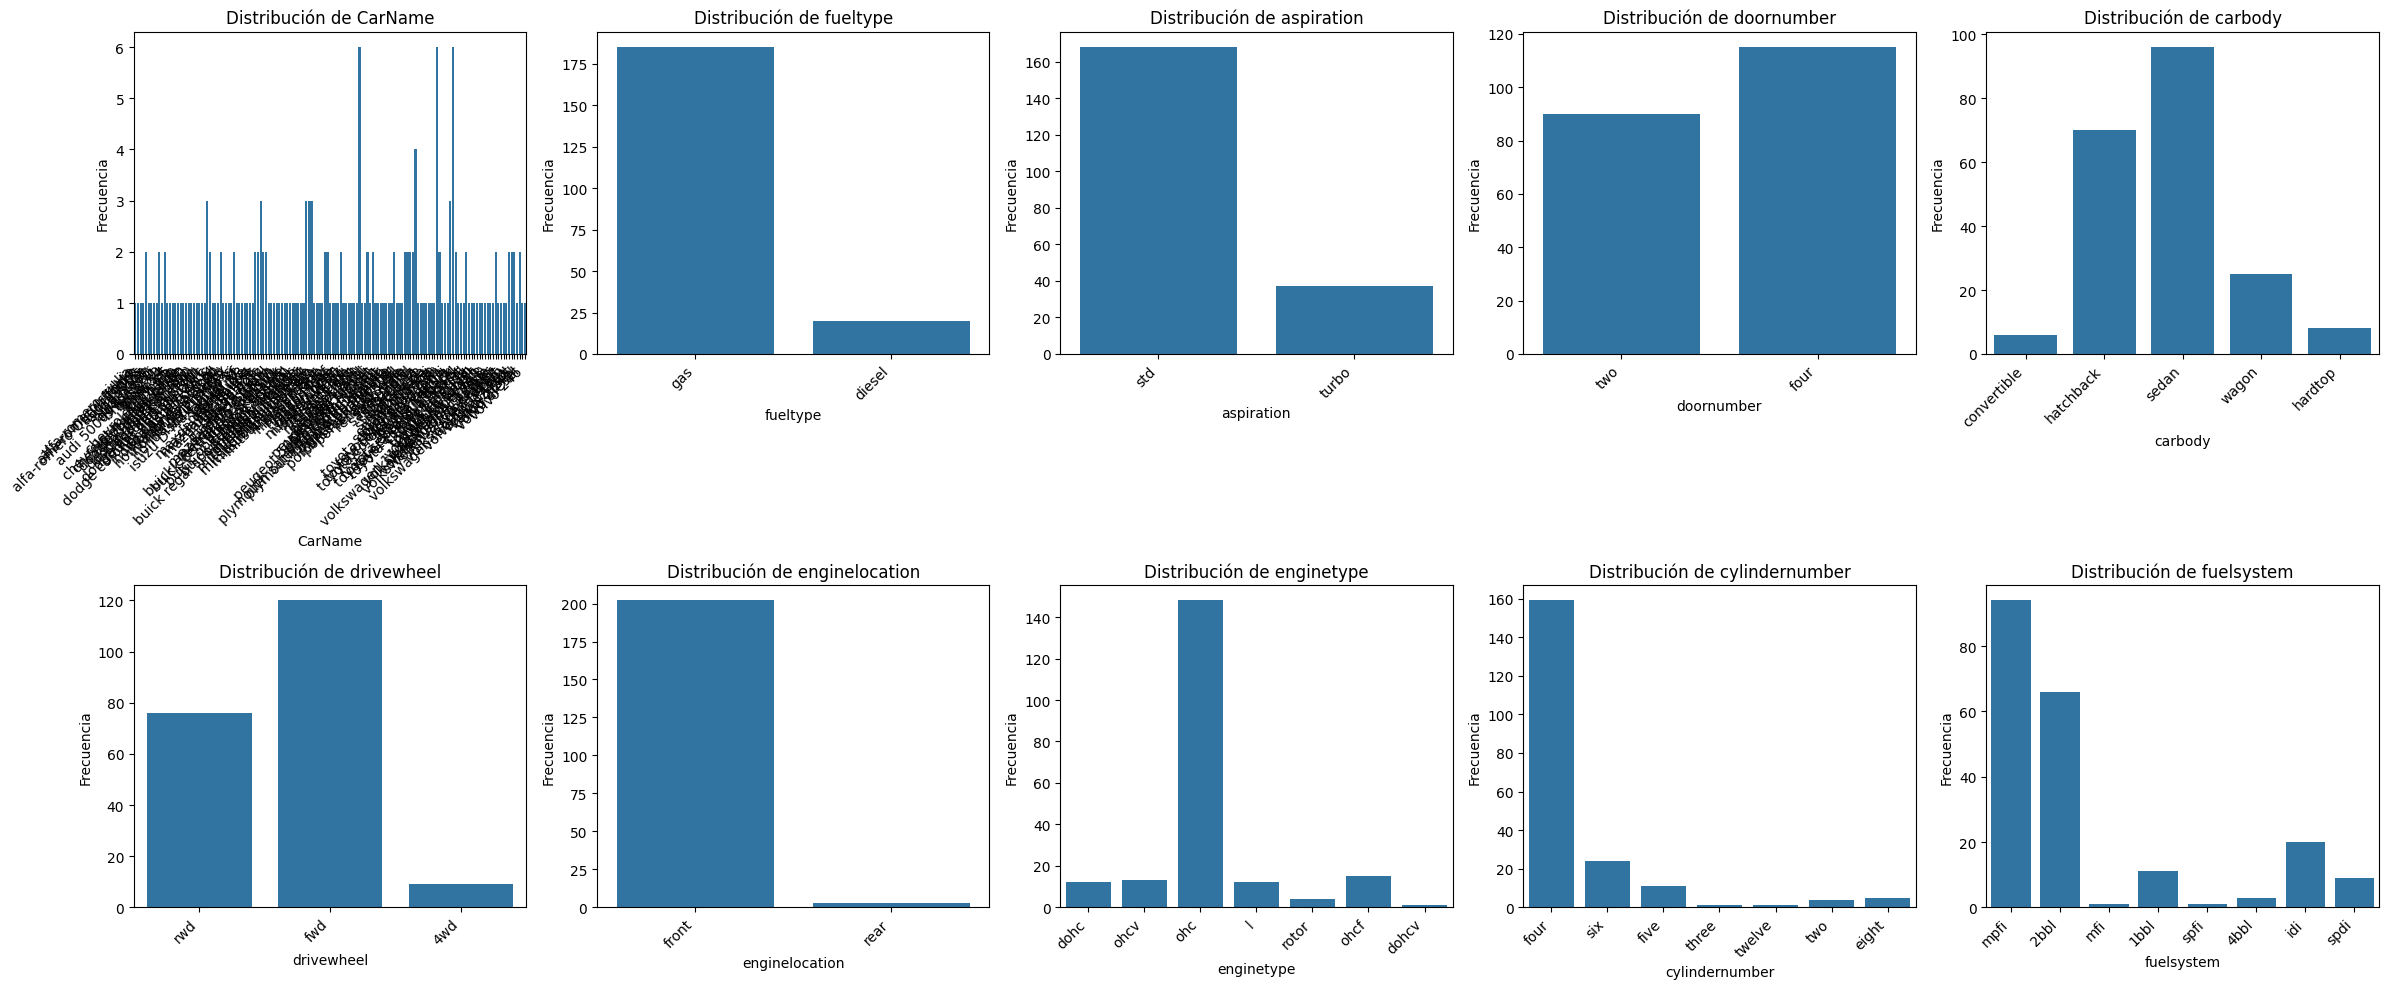

In [13]:
# Seleccionar columnas categóricas
categorical_columns = car_data.select_dtypes(include=['object', 'category']).columns

# Crear una figura con 5 columnas y 2 filas (para mostrar los 10 gráficos)
plt.figure(figsize=(24, 10))  # Ajusta el tamaño de la figura

# Bucle para generar 10 subplots (5x2)
for i, col in enumerate(categorical_columns[:10]):  # Limitar a las primeras 10 columnas
    plt.subplot(2, 5, i + 1)  # 2 filas y 5 columnas
    sns.countplot(data=car_data, x=col)  # Countplot para variables categóricas, eliminamos `palette`
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45, ha='right')  # Rotar etiquetas 45 grados y alinearlas a la derecha

plt.tight_layout()  # Ajustar el espacio entre los gráficos
plt.show()

Distribución de variables categóricas:

Algunas variables categóricas, como fueltype (tipo de combustible) y aspiration (tipo de aspiración), muestran una clara dominancia de ciertos valores. Por ejemplo, los autos que utilizan gasolina (gas) son abrumadoramente más comunes que los que usan diésel. Esto podría ser un indicio de que el tipo de combustible no tendrá tanto peso en la predicción del precio, ya que no hay suficiente variedad. Sin embargo, variables como carbody (tipo de carrocería) presentan más diversidad y podrían tener mayor relevancia.

Características de diseño del motor:

Las variables relacionadas con el motor, como cylindernumber (número de cilindros) y enginetype (tipo de motor), presentan distribuciones específicas. Por ejemplo, la mayoría de los autos tienen motores con cuatro cilindros, lo que podría ser un buen indicador para separar gamas de automóviles. Los autos con motores de más cilindros tienden a ser de mayor tamaño y potencia, lo que podría estar relacionado con vehículos de gama alta.

Paso 5: Preparando los datos para análisis o visualización

- Separé la columna CarName en dos columnas nuevas: marca y modelo, lo que facilita el análisis detallado de cada vehículo. 
- Para asegurar la consistencia, corregí errores tipográficos en los nombres de algunas marcas utilizando un diccionario de correcciones. 
- Ordené los datos alfabéticamente por marca y modelo para tener una vista clara de las combinaciones disponibles. 

Este proceso deja los datos listos para los próximos análisis y visualizaciones.

In [14]:
print(car_data.columns)  # controlar como estan escritas las variables


Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [15]:
# Separamos la columna car_ID en dos columnas (marca y modelo)
car_data['CarName'] = car_data['CarName'].str.lower()  # Cambia a 'CarName' con "C" mayúscula

# Corrección del split: usando n=1 como argumento de palabra clave
car_data[['marca', 'modelo']] = car_data['CarName'].str.split(' ', n=1, expand=True)

# Reorganizamos las columnas para que 'car_ID', 'CarName', 'marca', y 'modelo' sean las primeras
car_data = car_data[['car_ID', 'CarName', 'marca', 'modelo'] + [col for col in car_data.columns if col not in ['car_ID', 'CarName', 'marca', 'modelo']]]

# Estilo para alinear el contenido de las columnas 'marca' y 'modelo' a la izquierda
styled_cars = car_data.style.set_properties(**{'text-align': 'left'}, subset=['marca', 'modelo'])

# Eliminamos la columna 'CarName' ahora que hemos separado los datos
car_data = car_data.drop('CarName', axis=1)

# Mostramos los valores únicos de la columna marca
print("* Los valores únicos de la columna marca son:")
print("- " * 37)
print(car_data.marca.unique())


* Los valores únicos de la columna marca son:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota'
 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


Corrección de nombres de marcas
A veces los nombres de las marcas en los datos están mal escritos o tienen variaciones que no deseamos. Vamos a corregir esos errores para uniformar el dataset.

In [16]:
# Corrección de Nombres de Marca:
marca_correccion = {'alfa-romero': 'alfa romeo', 
                    'maxda': 'mazda',
                    'Nissan': 'nissan',
                    'porcshce': 'porsche',
                    'toyouta': 'toyota', 
                    'vokswagen': 'volkswagen',
                    'vw': 'volkswagen'}

# Aplicando las correcciones
car_data['marca'] = car_data['marca'].replace(marca_correccion)

Ordenamiento de los datos por Marca y Modelo

Para poder analizar los datos de manera más organizada, vamos a ordenar los vehículos por marca y modelo. Esto nos permitirá, por ejemplo, ver qué modelos están disponibles para cada marca.

In [17]:
# Ordenamiento de Datos:
sorted_cars = car_data.sort_values(by=['marca', 'modelo'], ascending=[True, True])
print("* Combinaciones únicas de marca y modelo:")
print("- " * 37)
print((car_data['marca'] + ' | ' + car_data['modelo'].astype(str)).unique(), end='\n\n')

* Combinaciones únicas de marca y modelo:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
['alfa romeo | giulia' 'alfa romeo | stelvio' 'alfa romeo | quadrifoglio'
 'audi | 100 ls' 'audi | 100ls' 'audi | fox' 'audi | 5000' 'audi | 4000'
 'audi | 5000s (diesel)' 'bmw | 320i' 'bmw | x1' 'bmw | x3' 'bmw | z4'
 'bmw | x4' 'bmw | x5' 'chevrolet | impala' 'chevrolet | monte carlo'
 'chevrolet | vega 2300' 'dodge | rampage' 'dodge | challenger se'
 'dodge | d200' 'dodge | monaco (sw)' 'dodge | colt hardtop'
 'dodge | colt (sw)' 'dodge | coronet custom' 'dodge | dart custom'
 'dodge | coronet custom (sw)' 'honda | civic' 'honda | civic cvcc'
 'honda | accord cvcc' 'honda | accord lx' 'honda | civic 1500 gl'
 'honda | accord' 'honda | civic 1300' 'honda | prelude'
 'honda | civic (auto)' 'isuzu | mu-x' 'isuzu | d-max '
 'isuzu | d-max v-cross' 'jaguar | xj' 'jaguar | xf' 'jaguar | xk'
 'mazda | rx3' 'mazda | glc deluxe' 'mazda | rx2 coupe' 'mazda | rx-4'
 'mazda | 626

Ordenamos los datos usando sort_values() por las columnas marca y modelo. Luego imprimimos una lista única de combinaciones para verificar que la limpieza y ordenación son correctas.

Paso 6: Exploración visual de otras variables clave.
- Gráfico de dispersión (Scatterplot)
Vamos a explorar la relación entre variables numéricas clave y el precio de los vehículos. Empezaremos con un scatterplot que mostrará la relación entre la potencia del motor (horsepower) y el precio (price).

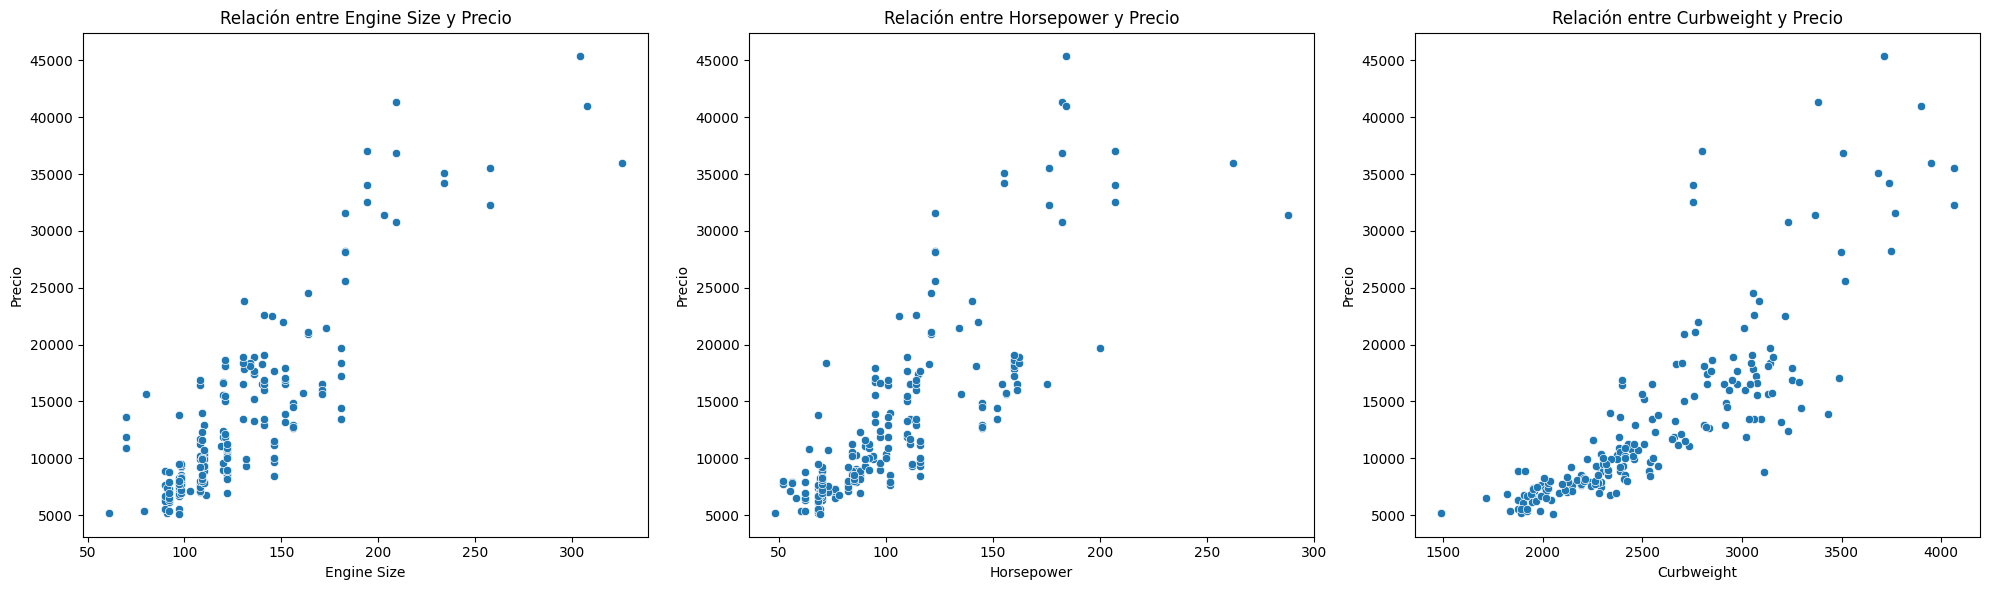

In [26]:
# Crear una figura con 3 gráficos en una fila
fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # 1 fila, 3 columnas

# Scatterplot entre enginesize y price
sns.scatterplot(x='enginesize', y='price', data=car_data, ax=axes[0])
axes[0].set_title('Relación entre Engine Size y Precio')
axes[0].set_xlabel('Engine Size')
axes[0].set_ylabel('Precio')

# Scatterplot entre horsepower y price
sns.scatterplot(x='horsepower', y='price', data=car_data, ax=axes[1])
axes[1].set_title('Relación entre Horsepower y Precio')
axes[1].set_xlabel('Horsepower')
axes[1].set_ylabel('Precio')

# Scatterplot entre curbweight y price
sns.scatterplot(x='curbweight', y='price', data=car_data, ax=axes[2])
axes[2].set_title('Relación entre Curbweight y Precio')
axes[2].set_xlabel('Curbweight')
axes[2].set_ylabel('Precio')

# Ajustar el espacio entre los gráficos
plt.tight_layout()
plt.show()


Relación entre características numéricas y el precio:

Los gráficos de dispersión que muestran la relación entre variables como el tamaño del motor (enginesize), la potencia (horsepower) y el peso del vehículo (curbweight) con respecto al precio, evidencian una relación positiva. Es decir, a medida que aumenta el tamaño del motor, la potencia o el peso del vehículo, el precio también tiende a aumentar. Esto me sugiere que estas variables serán importantes predictores en mi modelo de regresión, ya que parecen estar directamente relacionadas con el precio.

- Boxplot (gráfico de caja)
Esto me ayudará a ver la distribución de los precios en función de variables categóricas como el tipo de combustible, carrocería, etc.

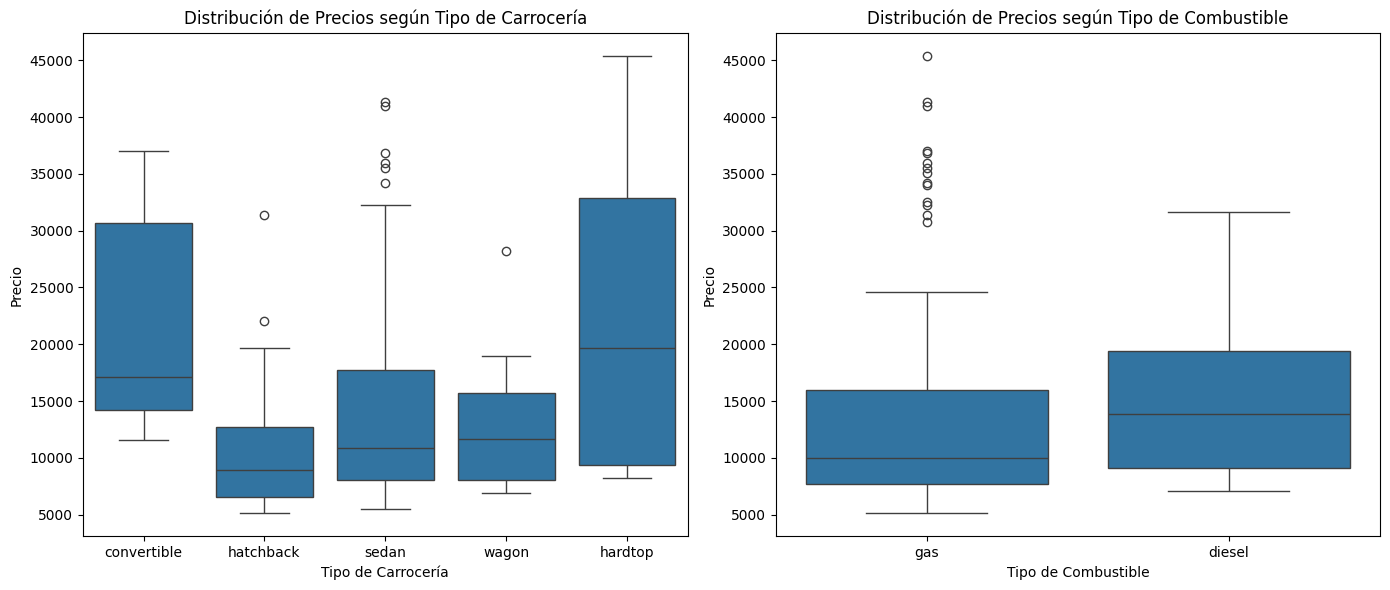

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustar el tamaño de los gráficos para mostrarlos en una fila
plt.figure(figsize=(14, 6))

# Boxplot para el tipo de carrocería (carbody) vs precio
plt.subplot(1, 2, 1)  # Primer gráfico (1 fila, 2 columnas, gráfico 1)
sns.boxplot(x='carbody', y='price', data=car_data)
plt.title('Distribución de Precios según Tipo de Carrocería')
plt.xlabel('Tipo de Carrocería')
plt.ylabel('Precio')

# Boxplot para el tipo de combustible (fueltype) vs precio
plt.subplot(1, 2, 2)  # Segundo gráfico (1 fila, 2 columnas, gráfico 2)
sns.boxplot(x='fueltype', y='price', data=car_data)
plt.title('Distribución de Precios según Tipo de Combustible')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Precio')

# Asegurar que los gráficos no se superpongan y se vean bien en la misma fila
plt.tight_layout()
plt.show()


- Mapa de calor de correlación (Heatmap)
Este gráfico te permitirá ver las correlaciones entre las variables numéricas del dataset, incluida la correlación del precio con otras variables.